In [1]:
#Edgar Moises Hernandez-Gonzalez
#08/07/19-16/12/19
#Clasificar habla imaginada en EEG sin parpadeo con LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [3]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [4]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [5]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [7]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
x = MinMaxScaler(feature_range=(-1,1)).fit_transform(x)

In [8]:
#convertir de 2D a 3D
x = x.reshape((n_samples, 6, 512))
print(x.shape)

(132, 6, 512)


In [9]:
x = np.transpose(x, (0,2,1))

print(x.shape)

(132, 512, 6)


In [10]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [33]:
model = Sequential()
model.add(LSTM(16, input_shape=(512, 6)))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 16)                1472      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
Total params: 1,574
Trainable params: 1,574
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 6s 65ms/sample - loss: 1.8297 - acc: 0.1313 - val_loss: 1.7905 - val_acc: 0.0909
Epoch 2/20
99/99 [==============================] - 5s 47ms/sample - loss: 1.8185 - acc: 0.1414 - val_loss: 1.7911 - val_acc: 0.0909
Epoch 3/20
99/99 [==============================] - 4s 43ms/sample - loss: 1.8273 - acc: 0.1010 - val_loss: 1.7919 - val_acc: 0.0909
Epoch 4/20
99/99 [==============================] - 5s 46ms/sample - loss: 1.8187 - acc: 0.1616 - val_loss: 1.7932 - val_acc: 0.0909
Epoch 5/20
99/99 [==============================] - 5s 47ms/sample - loss: 1.8063 - acc: 0.1818 - val_loss: 1.7943 - val_acc: 0.0909
Epoch 6/20
99/99 [==============================] - 5s 50ms/sample - loss: 1.8057 - acc: 0.1717 - val_loss: 1.7953 - val_acc: 0.1212
Epoch 7/20
99/99 [==============================] - 5s 48ms/sample - loss: 1.7979 - acc: 0.1313 - val_loss: 1.7961 - val_acc: 0.1212
Epoch 8/20
99/99 [=======

In [37]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 2s 50ms/sample - loss: 1.8028 - acc: 0.2121
Test loss: 1.8028343771443223
Test accuracy: 0.21212122


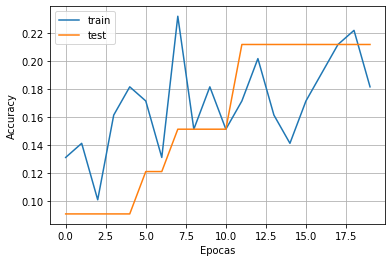

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

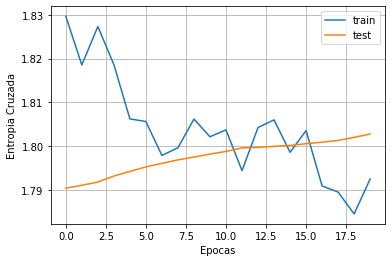

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()